# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

In [4]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["jet.png", "kw.png", "moon.png", "lenaSzum.png", "lena.png", "plansza.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

board = cv2.imread('plansza.png')          
board = cv2.cvtColor(board, cv2.COLOR_BGR2GRAY) 

ModuleNotFoundError: No module named 'scipy'

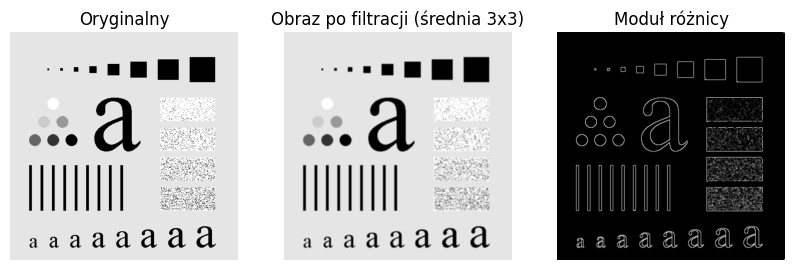

In [ ]:
filter_size = 3
averaging_filter = np.ones((filter_size, filter_size)) / (filter_size * filter_size)

smoothed_board = cv2.filter2D(board, -1, averaging_filter)

difference_image = np.abs(board- smoothed_board)


fig, axsHist = plt.subplots(1, 3, figsize=(10, 30))

axsHist[0].imshow(board, cmap='gray')
axsHist[0].set_title('Oryginalny')
axsHist[0].axis('off')

axsHist[1].imshow(smoothed_board, cmap='gray')
axsHist[1].set_title('Obraz po filtracji (średnia 3x3)')
axsHist[1].axis('off')

axsHist[2].imshow(difference_image, cmap='gray')
axsHist[2].set_title('Moduł różnicy')
axsHist[2].axis('off')

plt.show()

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

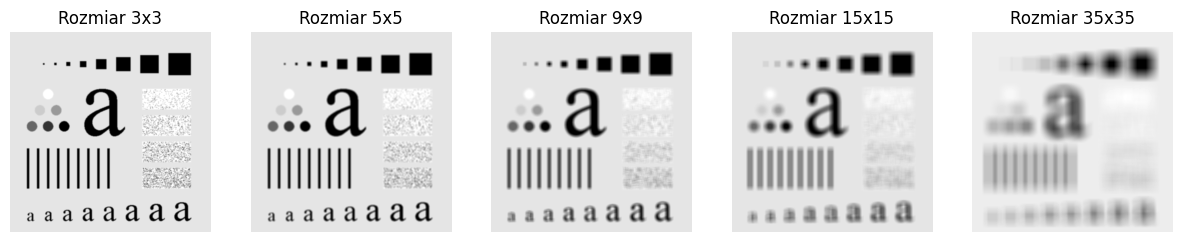

In [ ]:
filter_sizes = [3, 5, 9, 15, 35]
filtered_images = []

for size in filter_sizes:
    filter_kernel = np.ones((size, size)) / (size * size)
    smoothed_image = cv2.filter2D(board, -1, filter_kernel)
    filtered_images.append(smoothed_image)

plt.figure(figsize=(15, 5))
for i, img in enumerate(filtered_images):
    plt.subplot(1, len(filtered_images), i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Rozmiar {filter_sizes[i]}x{filter_sizes[i]}')
    plt.axis('off')
plt.show()


6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

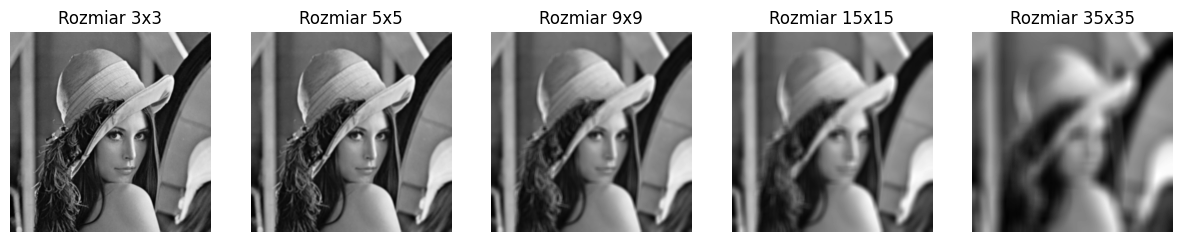

In [ ]:
lena = cv2.imread('lena.png')          
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY) 

filter_sizes = [3, 5, 9, 15, 35]
filtered_lena_images = []

for size in filter_sizes:
    filter_kernel = np.ones((size, size)) / (size * size)
    smoothed_image = cv2.filter2D(lena, -1, filter_kernel)
    filtered_lena_images.append(smoothed_image)

plt.figure(figsize=(15, 5))
for i, img in enumerate(filtered_lena_images):
    plt.subplot(1, len(filtered_lena_images), i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Rozmiar {filter_sizes[i]}x{filter_sizes[i]}')
    plt.axis('off')
plt.show()


7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

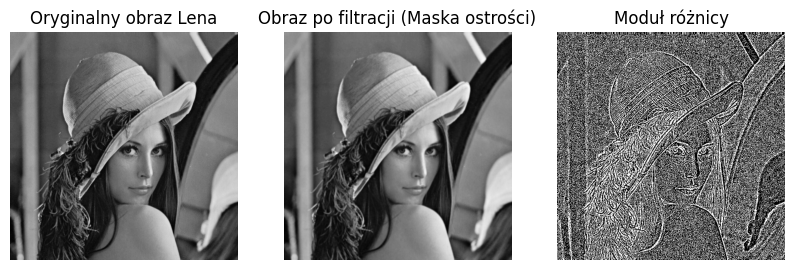

In [ ]:
mask = np.array([[1, 2, 1],
                 [2, 4, 2],
                 [1, 2, 1]])

mask = mask / np.sum(mask)

sharp_image = cv2.filter2D(lena, -1, mask)
difference_image = np.abs(lena - sharp_image)


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(lena, cmap='gray')
plt.title('Oryginalny obraz Lena')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sharp_image, cmap='gray')
plt.title('Obraz po filtracji (Maska ostrości)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(difference_image, cmap='gray')
plt.title('Moduł różnicy')
plt.axis('off')

plt.show()



8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


In [ ]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum() 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') 
    

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
    ax.plot_surface(X, Y, Z, cmap='viridis')
    
    plt.show()
    

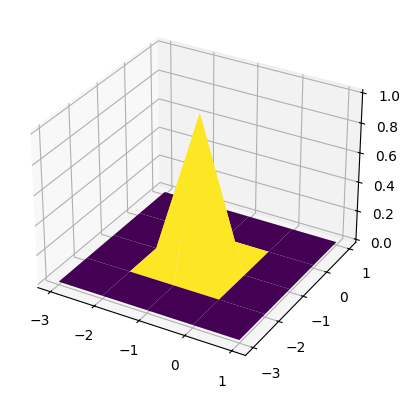

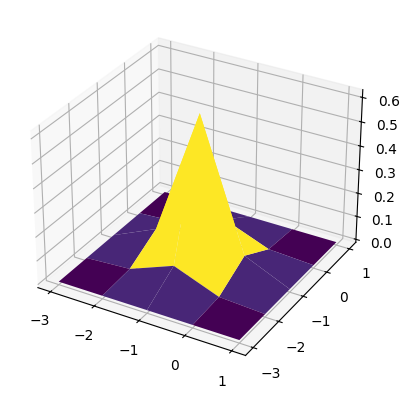

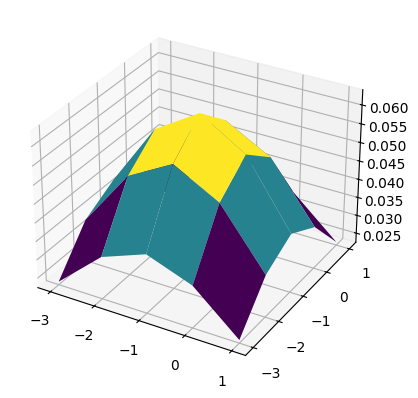

In [ ]:
mask1 = fgaussian(5, 0.1)
mesh(mask1, 5)
    
mask2 = fgaussian(5, 0.5)
mesh(mask2, 5)

mask3 = fgaussian(5, 2)
mesh(mask3, 5)

Text(0.5, 1.0, 'GaussianBlur 2')

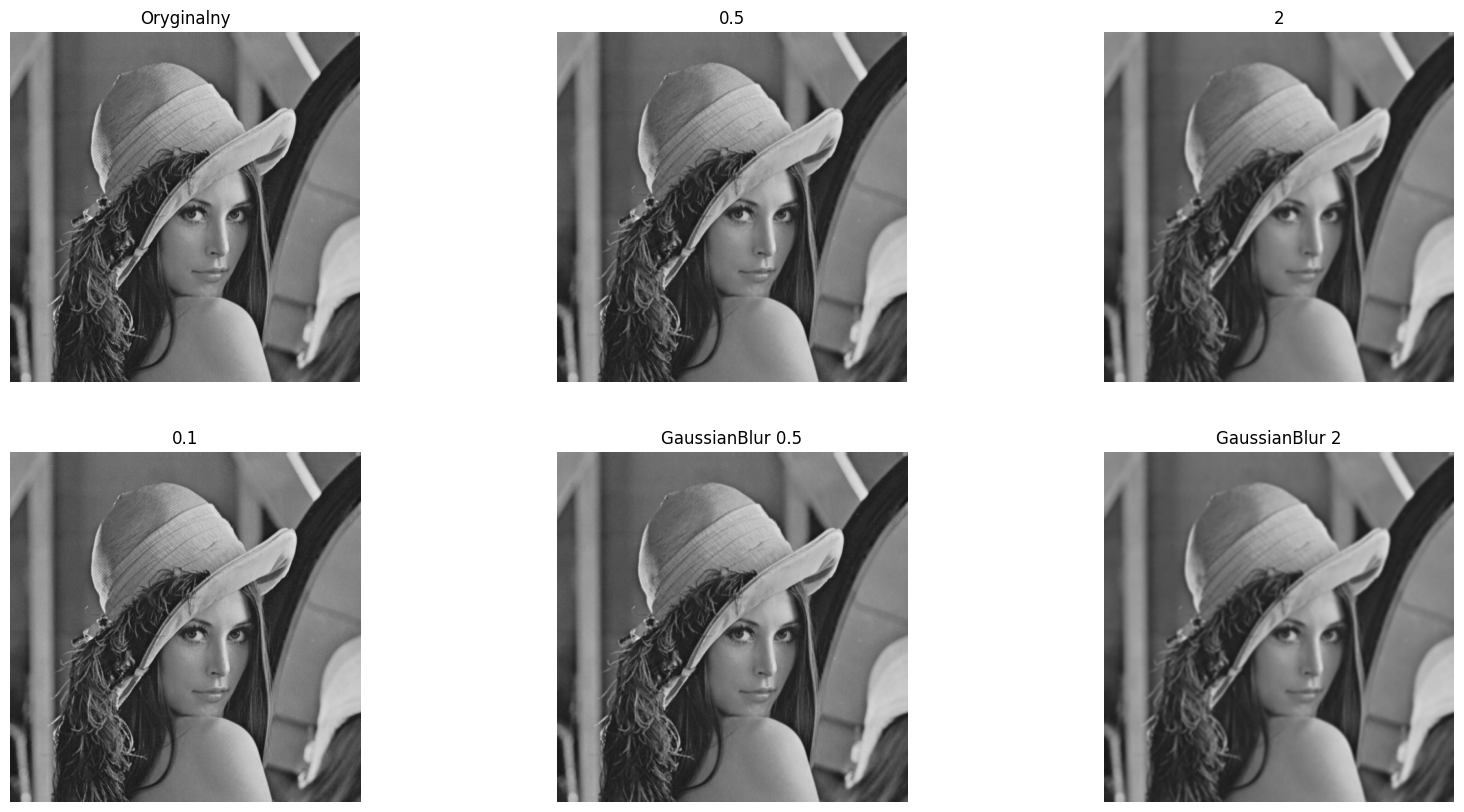

In [ ]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 10)

I1 = cv2.filter2D(lena, -1, mask1)
I2 = cv2.filter2D(lena, -1, mask2)
I3 = cv2.filter2D(lena, -1, mask3)
I4 = cv2.GaussianBlur(lena, (5, 5), 0.5)
I5 = cv2.GaussianBlur(lena, (5, 5), 2)

axs[0, 0].imshow(lena, 'gray', vmin=0, vmax=256)
axs[0, 0].axis('off')
axs[0, 0].set_title("Oryginalny")
axs[1, 0].imshow(I1, 'gray', vmin=0, vmax=256)
axs[1, 0].axis('off')
axs[1, 0].set_title("0.1")
axs[0, 1].imshow(I2, 'gray', vmin=0, vmax=256)
axs[0, 1].axis('off')
axs[0, 1].set_title("0.5")
axs[0, 2].imshow(I3, 'gray', vmin=0, vmax=256)
axs[0, 2].axis('off')
axs[0, 2].set_title("2")
axs[1, 1].imshow(I4, 'gray', vmin=0, vmax=256)
axs[1, 1].axis('off')
axs[1, 1].set_title("GaussianBlur 0.5")
axs[1, 2].imshow(I5, 'gray', vmin=0, vmax=256)
axs[1, 2].axis('off')
axs[1, 2].set_title("GaussianBlur 2")


### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


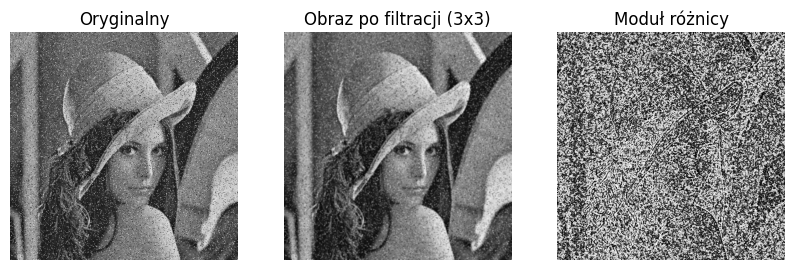

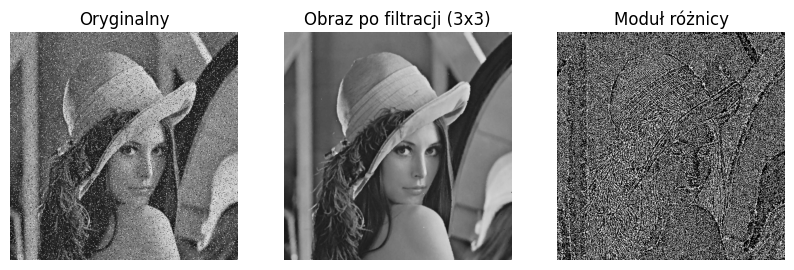

In [ ]:
lenaSzum = cv2.imread('lenaSzum.png')          
lenaSzum = cv2.cvtColor(lenaSzum, cv2.COLOR_BGR2GRAY) 

filter_size = 3
averaging_filter = np.ones((filter_size, filter_size)) / (filter_size * filter_size)

smoothed_lenaSzum = cv2.filter2D(lenaSzum, -1, averaging_filter)

difference_image = np.abs(lenaSzum - smoothed_lenaSzum)


fig, axsHist = plt.subplots(1, 3, figsize=(10, 30))

axsHist[0].imshow(lenaSzum, cmap='gray')
axsHist[0].set_title('Oryginalny')
axsHist[0].axis('off')

axsHist[1].imshow(smoothed_lenaSzum, cmap='gray')
axsHist[1].set_title('Obraz po filtracji (3x3)')
axsHist[1].axis('off')

axsHist[2].imshow(difference_image, cmap='gray')
axsHist[2].set_title('Moduł różnicy')
axsHist[2].axis('off')

plt.show()

smoothed_lenaSzum2 = cv2.medianBlur(lenaSzum, 3)

difference_image = np.abs(lenaSzum - smoothed_lenaSzum2)


fig, axsHist = plt.subplots(1, 3, figsize=(10, 30))

axsHist[0].imshow(lenaSzum, cmap='gray')
axsHist[0].set_title('Oryginalny')
axsHist[0].axis('off')

axsHist[1].imshow(smoothed_lenaSzum2, cmap='gray')
axsHist[1].set_title('Obraz po filtracji (3x3)')
axsHist[1].axis('off')

axsHist[2].imshow(difference_image, cmap='gray')
axsHist[2].set_title('Moduł różnicy')
axsHist[2].axis('off')

plt.show()

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

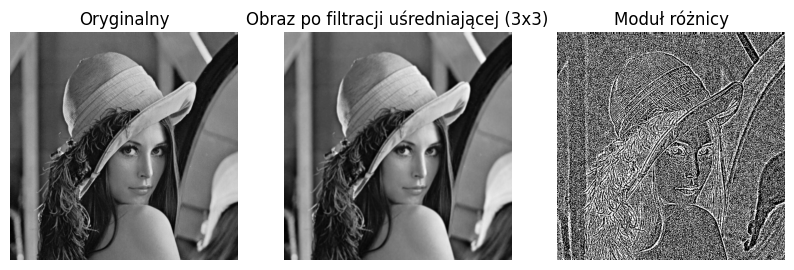

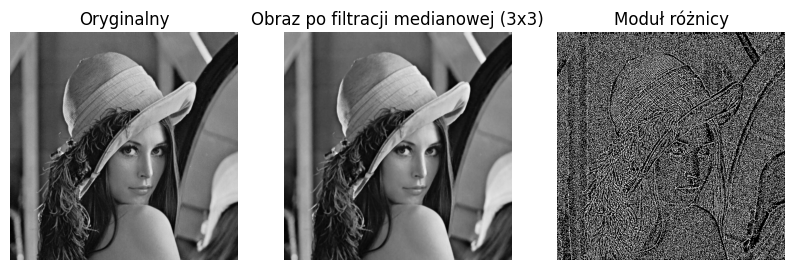

In [ ]:
avg_filtered_image = cv2.blur(lena, (3, 3))
diff_avg = np.abs(lena - avg_filtered_image)

median_filtered_image = cv2.medianBlur(lena, 3)
diff_median = np.abs(lena - median_filtered_image)


fig, axsHist = plt.subplots(1, 3, figsize=(10, 30))

axsHist[0].imshow(lena, cmap='gray')
axsHist[0].set_title('Oryginalny')
axsHist[0].axis('off')

axsHist[1].imshow(avg_filtered_image, cmap='gray')
axsHist[1].set_title('Obraz po filtracji uśredniającej (3x3)')
axsHist[1].axis('off')

axsHist[2].imshow(diff_avg, cmap='gray')
axsHist[2].set_title('Moduł różnicy')
axsHist[2].axis('off')
plt.show()


fig, axsHist = plt.subplots(1, 3, figsize=(10, 30))

axsHist[0].imshow(lena, cmap='gray')
axsHist[0].set_title('Oryginalny')
axsHist[0].axis('off')

axsHist[1].imshow(median_filtered_image, cmap='gray')
axsHist[1].set_title('Obraz po filtracji medianowej (3x3)')
axsHist[1].axis('off')

axsHist[2].imshow(diff_median, cmap='gray')
axsHist[2].set_title('Moduł różnicy')
axsHist[2].axis('off')
plt.show()

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

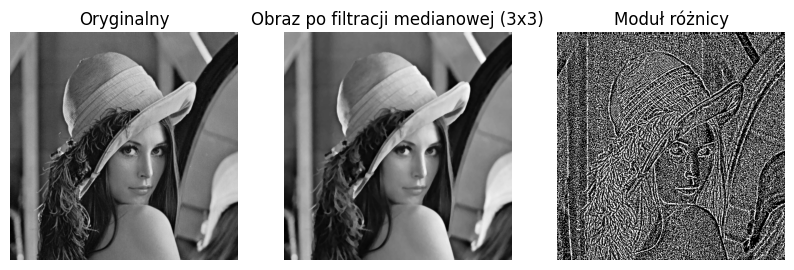

In [ ]:
median_filtered_image = lena
for i in range(10):
    median_filtered_image = cv2.medianBlur(median_filtered_image, 3)
    
diff_median = np.abs(lena - median_filtered_image)

fig, axsHist = plt.subplots(1, 3, figsize=(10, 30))

axsHist[0].imshow(lena, cmap='gray')
axsHist[0].set_title('Oryginalny')
axsHist[0].axis('off')

axsHist[1].imshow(median_filtered_image, cmap='gray')
axsHist[1].set_title('Obraz po filtracji medianowej (3x3)')
axsHist[1].axis('off')

axsHist[2].imshow(diff_median, cmap='gray')
axsHist[2].set_title('Moduł różnicy')
axsHist[2].axis('off')
plt.show()

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

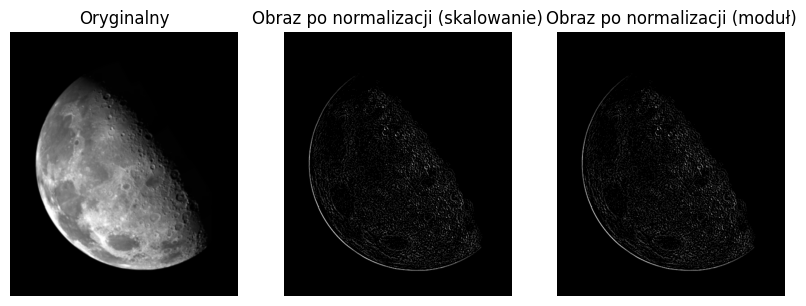

In [ ]:
moon = cv2.imread('moon.png')          
moon = cv2.cvtColor(moon, cv2.COLOR_BGR2GRAY) 

laplacian_mask = np.array([[0, 1, 0],
                            [1, -4, 1],
                            [0, 1, 0]])

normalized_laplacian_mask = laplacian_mask / 9

laplacian_image = cv2.filter2D(moon, -1, normalized_laplacian_mask)
laplacian_image_norm = laplacian_image + 128
laplacian_image_abs = np.abs(laplacian_image)

fig, axsHist = plt.subplots(1, 3, figsize=(10, 40))

axsHist[0].imshow(moon, cmap='gray')
axsHist[0].set_title('Oryginalny')
axsHist[0].axis('off')

axsHist[1].imshow(laplacian_image_norm, cmap='gray')
axsHist[1].set_title('Obraz po normalizacji (skalowanie)')
axsHist[1].axis('off')

axsHist[2].imshow(laplacian_image_abs, cmap='gray')
axsHist[2].set_title('Obraz po normalizacji (moduł)')
axsHist[2].axis('off')
plt.show()



7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



In [ ]:
sum = moon + laplacian_image_norm
diff = np.abs(moon.astype(np.int32) - laplacian_image_norm.astype(np.int32))

fig, axsHist = plt.subplots(1, 3, figsize=(10, 40))

axsHist[0].imshow(moon, cmap='gray')
axsHist[0].set_title('Oryginalny')
axsHist[0].axis('off')

axsHist[1].imshow(sum, cmap='gray')
axsHist[1].set_title('Oryginalny + po filtracji')
axsHist[1].axis('off')

axsHist[2].imshow(diff, cmap='gray')
axsHist[2].set_title('Oryginalny - po filtracji')
axsHist[2].axis('off')
plt.show()

NameError: name 'moon' is not defined

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

In [ ]:
def show_plt(original,I2, I3):
    fig, axsHist = plt.subplots(1, 3, figsize=(10, 40))

    axsHist[0].imshow(original, cmap='gray')
    axsHist[0].set_title('Oryginalny')
    axsHist[0].axis('off')

    axsHist[1].imshow(I2, cmap='gray')
    axsHist[1].set_title('Obraz po normalizacji (skalowanie)')
    axsHist[1].axis('off')

    axsHist[2].imshow(I3, cmap='gray')
    axsHist[2].set_title('Obraz po normalizacji (moduł)')
    axsHist[2].axis('off')
    plt.show()

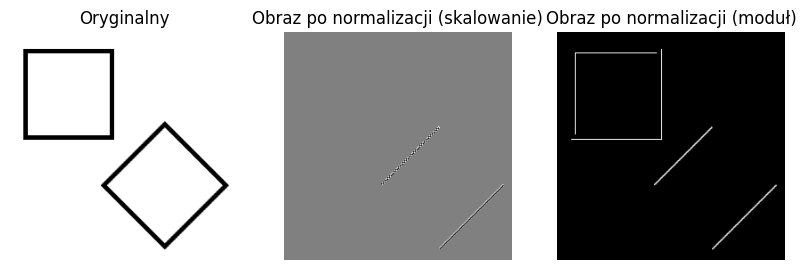

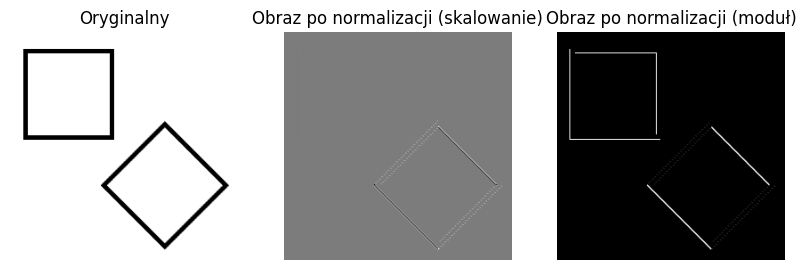

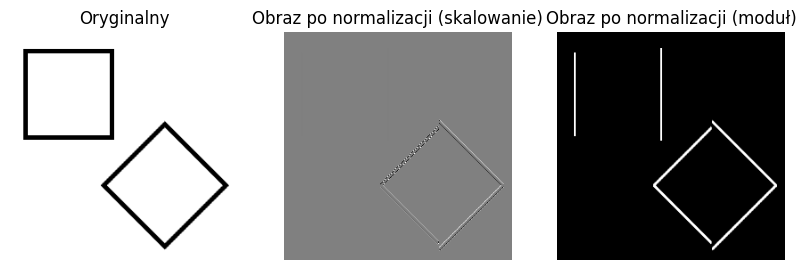

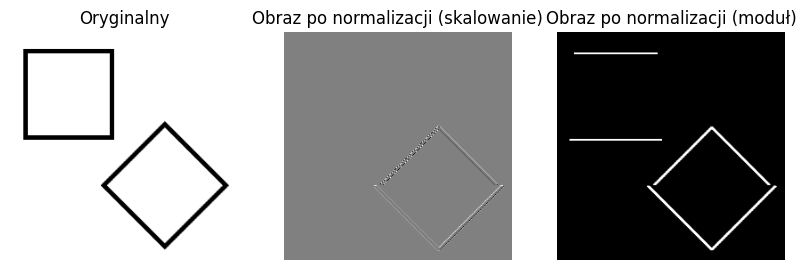

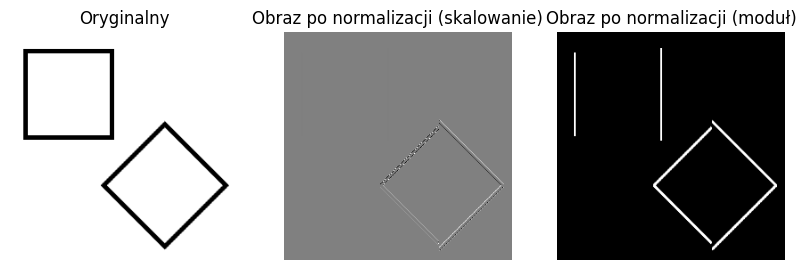

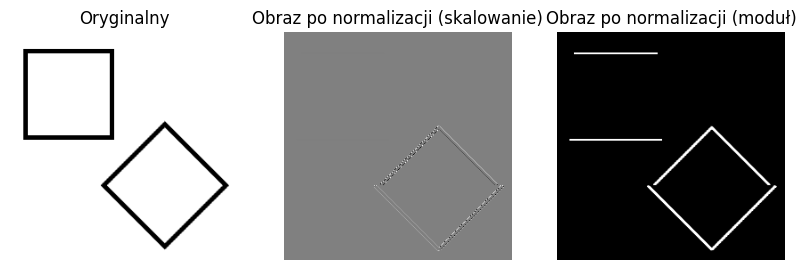

In [ ]:
kw = cv2.imread('kw.png')          
kw = cv2.cvtColor(kw, cv2.COLOR_BGR2GRAY) 

R1 = np.array([ [0, 0, 0],
                [-1, 0, 0],
                [0, 1, 0]])

R2 = np.array( [[0, 0, 0],
                [0, 0, -1],
                [0, 1, 0]])

P1 = np.array([ [-1, 0, 1],
                [-1, 0, 1],
                [-1, 0, 1]])

P2 = np.array( [[-1, -1, -1],
                [0, 0, 0],
                [1, 1, 1]])

S1 = np.array([ [-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]])

S2 = np.array( [[-1, -2, -1],
                [0, 0, 0],
                [1, 2, 1]])


gradient_R1 = cv2.filter2D(kw, -1, R1)
gradient_R2 = cv2.filter2D(kw, -1, R2)
gradient_P1 = cv2.filter2D(kw, -1, P1)
gradient_P2 = cv2.filter2D(kw, -1, P2)
gradient_S1 = cv2.filter2D(kw, -1, S1)
gradient_S2 = cv2.filter2D(kw, -1, S2)

show_plt(kw, gradient_R1 + 128, np.abs(gradient_R1))
show_plt(kw, gradient_R2 + 128, np.abs(gradient_R2))
show_plt(kw, gradient_P1 + 128, np.abs(gradient_P1))
show_plt(kw, gradient_P2 + 128, np.abs(gradient_P2))
show_plt(kw, gradient_S1 + 128, np.abs(gradient_S1))
show_plt(kw, gradient_S2 + 128, np.abs(gradient_S2))

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



/var/folders/j0/4w2hc5p557nd02zgl7r_cfnr0000gn/T/ipykernel_6248/935450485.py:5: RuntimeWarning: invalid value encountered in sqrt
  combined_gradient = np.sqrt(gradient_S1**2 + gradient_S2**2)


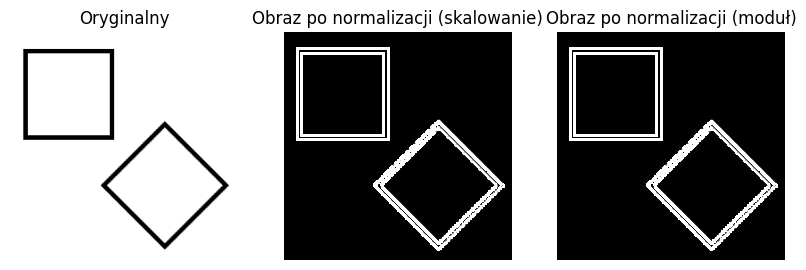

In [ ]:
kw_signed = kw.astype(np.int16)
gradient_S1 = cv2.filter2D(kw_signed, -1, S1)
gradient_S2 = cv2.filter2D(kw_signed, -1, S2)

combined_gradient = np.sqrt(gradient_S1**2 + gradient_S2**2)

show_plt(kw_signed, combined_gradient + 128, np.abs(combined_gradient))

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

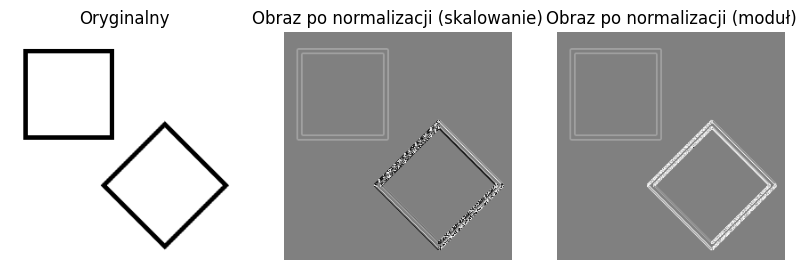

In [ ]:
combined_gradient = np.abs(gradient_S1**2) + np.abs(gradient_S2**2)

show_plt(kw_signed, combined_gradient + 128, np.abs(combined_gradient))

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

/var/folders/j0/4w2hc5p557nd02zgl7r_cfnr0000gn/T/ipykernel_6248/1526035436.py:8: RuntimeWarning: invalid value encountered in sqrt
  combined_gradient = np.sqrt(gradient_S1**2 + gradient_S2**2)


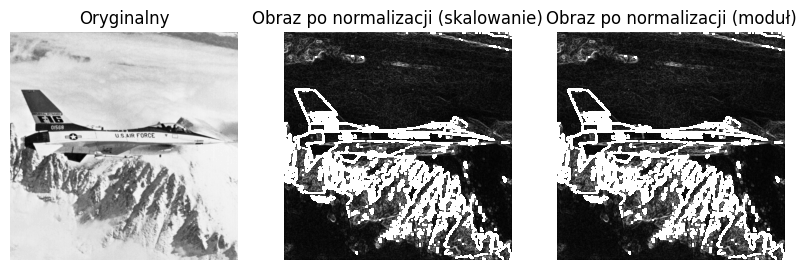

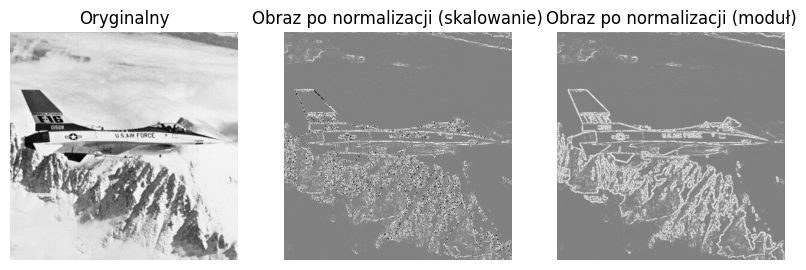

In [ ]:
jet = cv2.imread('jet.png')          
jet = cv2.cvtColor(jet, cv2.COLOR_BGR2GRAY) 

jet_signed = jet.astype(np.int16)
gradient_S1 = cv2.filter2D(jet_signed, -1, S1)
gradient_S2 = cv2.filter2D(jet_signed, -1, S2)

combined_gradient = np.sqrt(gradient_S1**2 + gradient_S2**2)

show_plt(jet_signed, combined_gradient + 128, np.abs(combined_gradient))

combined_gradient = np.abs(gradient_S1**2) + np.abs(gradient_S2**2)

show_plt(jet_signed, combined_gradient + 128, np.abs(combined_gradient))